***
# <h1><center>Effects From COVID-19: Metro Texas and California</center></h1>
 <h1><center>Capstone Project 2 Springboard</center></h1>
 <h1><center>Graham Whisenhunt</center></h1>
 <h1><center><a href="https://www.linkedin.com/in/grahamwhisenhunt/" target="_blank">LinkedIn</a></center></h1>

 ![Image Credit: The University of Tennessee](https://tennessee.edu/wp-content/uploads/2020/03/feat-2871-CDC-PHIL-COVID19-20.jpg)

### Coronavirus disease 2019 (COVID-19) is a new virus that can cause severe illness and death. Older adults and people with certain underlying medical conditions are at increased risk of severe illness. It was first identified in Wuhan, China in December 2019. This notebook aims to evaluate the disease, tracking cases and deaths related to COVID-19.

### Data provided by:
<h3><center><a href="https://covid.cdc.gov/covid-data-tracker/#cases_casesper100klast7days" target="_blank">Center for Disease and Control</a></center></h3>
<h3><center><a href="https://dshs.texas.gov/coronavirus/AdditionalData.aspx" target="_blank">Texas Health and Human Services</a></center></h3>
<h3><center><a href="https://data.ca.gov/dataset/covid-19-time-series-metrics-by-county-and-state1" target="_blank">California Health and Human Services</a></center></h3>

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md
import statsmodels.api as sm
mpl.rcParams['figure.figsize']=(20,10)
%matplotlib inline
import datetime
plt.style.use('fivethirtyeight')

***
# Data Sources
***

### United States CDC Data

In [2]:
# National CDC Case Data from Socrata Open Data API
us_url = "https://data.cdc.gov/resource/9mfq-cb36.json"

# Read in json file
df_us_raw = pd.read_json(us_url)

df_us_raw.info()
df_us_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   submission_date  1000 non-null   object        
 1   state            1000 non-null   object        
 2   tot_cases        1000 non-null   int64         
 3   new_case         1000 non-null   int64         
 4   pnew_case        844 non-null    float64       
 5   tot_death        1000 non-null   int64         
 6   new_death        1000 non-null   int64         
 7   pnew_death       824 non-null    float64       
 8   created_at       1000 non-null   datetime64[ns]
 9   consent_cases    904 non-null    object        
 10  consent_deaths   904 non-null    object        
 11  conf_death       388 non-null    float64       
 12  prob_death       388 non-null    float64       
 13  conf_cases       445 non-null    float64       
 14  prob_cases       445 non-null    float64 

,submission_date,state,tot_cases,new_case,pnew_case,tot_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,conf_death,prob_death,conf_cases,prob_cases
0,2020-12-08T00:00:00.000,NM,109947,0,0.0,1756,0,0.0,2020-12-09 14:45:40.234,N/A,Not agree,NaN,NaN,NaN,NaN
1,2020-08-29T00:00:00.000,SD,12942,425,0.0,167,2,0.0,2020-08-30 14:49:52.418,N/A,Agree,165.0,2.0,NaN,NaN
2,2020-11-06T00:00:00.000,SD,52639,1488,73.0,510,28,3.0,2020-11-07 14:45:17.940,N/A,Agree,476.0,34.0,NaN,NaN
3,2020-09-21T00:00:00.000,MP,69,0,0.0,2,0,0.0,2020-09-22 13:51:57.795,Agree,Agree,2.0,0.0,69.0,0.0
4,2020-06-28T00:00:00.000,PA,85988,492,13.0,6614,8,4.0,2020-06-29 14:37:31.240,Agree,Not agree,NaN,NaN,83529.0,2459.0


### Texas Health and Human Services Data

In [3]:
# Import Texas Case Data
txcases_url = "https://dshs.texas.gov/coronavirus/TexasCOVID19DailyCountyCaseCountData.xlsx"
df_txcases_raw = pd.read_excel(txcases_url, header=2, nrows=255, parse_dates=True)

df_txcases_raw.info()
df_txcases_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Columns: 425 entries, County Name to Cases 05-04-2021
dtypes: int64(424), object(1)
memory usage: 846.8+ KB


,County Name,Cases 03-04-2020,Cases 03-05-2020,Cases 03-06-2020,Cases 03-09-2020,Cases 03-10-2020,Cases 03-11-2020,Cases 03-12-2020,Cases 03-13-2020,Cases 03-15-2020,...,Cases 04-25-2021,Cases 04-26-2021,Cases 04-27-2021,Cases 04-28-2021,Cases 04-29-2021,Cases 04-30-2021,Cases 05-01-2021,Cases 05-02-2021,Cases 05-03-2021,Cases 05-04-2021
0,Anderson,0,0,0,0,0,0,0,0,0,...,4744,4744,4738,4735,4732,4753,4749,4749,4749,4735
1,Andrews,0,0,0,0,0,0,0,0,0,...,1812,1812,1812,1812,1812,1816,1816,1816,1816,1816
2,Angelina,0,0,0,0,0,0,0,0,0,...,4882,4882,4882,4882,4882,4882,4882,4911,4911,4911
3,Aransas,0,0,0,0,0,0,0,0,0,...,949,949,951,951,953,955,955,955,955,956
4,Archer,0,0,0,0,0,0,0,0,0,...,685,685,685,686,686,686,687,687,687,688


In [4]:
# Import Texas Fatality Data
txdeaths_url = "https://dshs.texas.gov/coronavirus/TexasCOVID19DailyCountyFatalityCountData.xlsx"
df_txdeaths_raw = pd.read_excel(txdeaths_url, header=2, nrows=256, parse_dates=True)

df_txdeaths_raw.info()
df_txdeaths_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Columns: 424 entries, County Name to Fatalities 05-03-2021
dtypes: int64(423), object(1)
memory usage: 848.1+ KB


,County Name,Fatalities 03-07-2020,Fatalities 03-08-2020,Fatalities 03-09-2020,Fatalities 03-10-2020,Fatalities 03-11-2020,Fatalities 03-12-2020,Fatalities 03-13-2020,Fatalities 03-14-2020,Fatalities 03-15-2020,...,Fatalities 04-24-2021,Fatalities 04-25-2021,Fatalities 04-26-2021,Fatalities 04-27-2021,Fatalities 04-28-2021,Fatalities 04-29-2021,Fatalities 04-30-2021,Fatalities 05-01-2021,Fatalities 05-02-2021,Fatalities 05-03-2021
0,ANDERSON,0,0,0,0,0,0,0,0,0,...,121,121,121,121,121,121,121,121,121,121
1,ANDREWS,0,0,0,0,0,0,0,0,0,...,47,47,47,47,47,47,47,47,47,47
2,ANGELINA,0,0,0,0,0,0,0,0,0,...,279,279,279,279,279,279,279,279,279,279
3,ARANSAS,0,0,0,0,0,0,0,0,0,...,39,39,39,39,39,39,39,39,39,39
4,ARCHER,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12


### California Health and Human Services Data

In [5]:
# Import Statewide COVID-19 Cases and Deaths Data for California
ca_url = "https://data.chhs.ca.gov/dataset/f333528b-4d38-4814-bebb-12db1f10f535/resource/046cdd2b-31e5-4d34-9ed3-b48cdbc4be7a/download/covid19cases_test.csv"
df_ca_raw = pd.read_csv(ca_url, parse_dates=True)

df_ca_raw.info()
df_ca_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27999 entries, 0 to 27998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             27999 non-null  object 
 1   area             27999 non-null  object 
 2   area_type        27999 non-null  object 
 3   population       27081 non-null  float64
 4   cases            27540 non-null  float64
 5   deaths           27540 non-null  float64
 6   total_tests      27938 non-null  float64
 7   positive_tests   27938 non-null  float64
 8   reported_cases   27540 non-null  float64
 9   reported_deaths  27540 non-null  float64
 10  reported_tests   22265 non-null  float64
dtypes: float64(8), object(3)
memory usage: 2.3+ MB


,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,2021-05-04,Alameda,County,1685886.0,0.0,0.0,NaN,NaN,49.0,5.0,5582.0
1,2021-05-04,Alpine,County,1117.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2,2021-05-04,Amador,County,38531.0,0.0,0.0,NaN,NaN,-1.0,0.0,42.0
3,2021-05-04,Butte,County,217769.0,0.0,0.0,NaN,NaN,19.0,0.0,421.0
4,2021-05-04,Calaveras,County,44289.0,0.0,0.0,NaN,NaN,1.0,2.0,61.0


***
# Data Cleansing
***

### US CDC Data

In [6]:
# Drop columns that aren't to be utilized
df_us = df_us_raw.drop(['pnew_case', 'pnew_death', 'created_at', 'consent_cases',
                      'consent_deaths', 'prob_death', 'prob_cases', 'conf_cases', 'conf_death'], axis=1)
# Rename columns
df_us.columns = ['Date', 'State', 'Total_Cases', 'New_Cases', 'Total_Deaths',
                   'New_Deaths']
# Convert datetime format
df_us['Date'] = pd.to_datetime(df_us['Date'], yearfirst=True)

# Set datetime index and sort by date
df_us = df_us.set_index('Date').sort_values(by= 'Date')

df_us

,State,Total_Cases,New_Cases,Total_Deaths,New_Deaths
Date,,,,,
2020-01-22,MA,0,0,0,0
2020-01-23,UT,0,0,0,0
2020-01-23,GA,0,0,0,0
2020-01-26,PR,0,0,0,0
2020-01-26,UT,0,0,0,0
...,...,...,...,...,...
2021-04-30,SD,122660,128,1967,5
2021-05-01,PW,0,0,0,0
2021-05-01,NYC,930714,1320,32635,34


<AxesSubplot:title={'center':'US Data: Tan = Missing Data'}, ylabel='Date'>

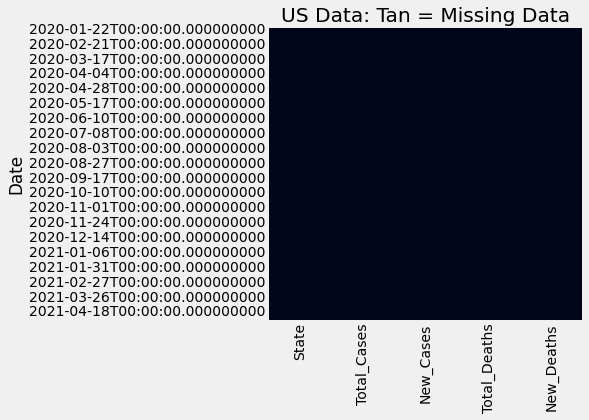

In [7]:
# Heatmap revealing missing data for US data
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('US Data: Tan = Missing Data')
sns.heatmap(df_us.isnull(), cbar=False)

In [8]:
# Looking at data types
df_us.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2020-01-22 to 2021-05-02
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   State         1000 non-null   object
 1   Total_Cases   1000 non-null   int64 
 2   New_Cases     1000 non-null   int64 
 3   Total_Deaths  1000 non-null   int64 
 4   New_Deaths    1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 46.9+ KB


### Texas HHS Data

In [9]:
# Melt function to convert wide dataframe tx_cases to narrow; sort by date
df_txcases = df_txcases_raw.melt(id_vars=['County Name'], var_name= 'Date', 
                                 value_name= 'Cases').sort_values(by='Date').reset_index(drop=True)
# Split date column into two columns to isolate date
df_txcases[['Type', 'Date']] = df_txcases['Date'].str.split(" ", n=1, expand=True)

# Convert Date dtype object to datetime
df_txcases['Date'] = pd.to_datetime(df_txcases['Date'])

# Set datetime index and sort dates
df_txcases = df_txcases.set_index('Date').sort_values(by='Date')

df_txcases

,County Name,Cases,Type
Date,,,
2020-03-04,Ellis,0,Cases
2020-03-04,Baylor,0,Cases
2020-03-04,Bee,0,Cases
2020-03-04,Bell,0,Cases
2020-03-04,Bexar,0,Cases
...,...,...,...
2021-05-04,Andrews,1816,Cases
2021-05-04,Anderson,4735,Cases
2021-05-04,Bell,22401,Cases


<AxesSubplot:title={'center':'TX Cases: Tan = Missing Data'}, ylabel='Date'>

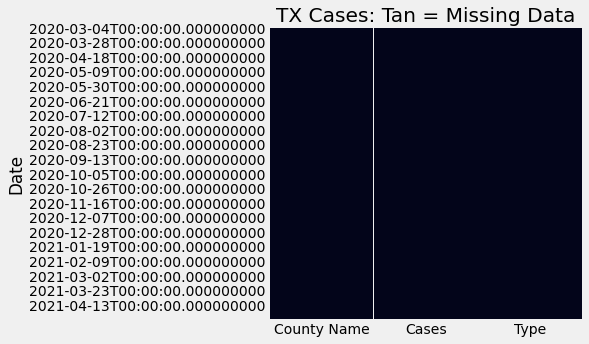

In [10]:
# Heatmap revealing missing data
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('TX Cases: Tan = Missing Data')
sns.heatmap(df_txcases.isnull(), cbar=False)

In [11]:
# Looking at data types
df_txcases.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108120 entries, 2020-03-04 to 2021-05-04
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   County Name  108120 non-null  object
 1   Cases        108120 non-null  int64 
 2   Type         108120 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.3+ MB


In [12]:
# Melt function to convert wide dataframe tx_deaths to narrow; sort by date
df_txdeaths = df_txdeaths_raw.melt(id_vars=['County Name'], var_name='Date', 
                                  value_name= 'Deaths').sort_values(by='Date').reset_index(drop=True)
# Split date column into two columns to isolate date
df_txdeaths[['Type', 'Date']] = df_txdeaths['Date'].str.split(" ", n=1, expand=True)

# Convert Date dtype object to datetime
df_txdeaths['Date'] = pd.to_datetime(df_txdeaths['Date'])

# Set datetime index and sort by date
df_txdeaths = df_txdeaths.set_index('Date').sort_values(by='Date')

df_txdeaths

,County Name,Deaths,Type
Date,,,
2020-03-07,UNKNOWN,0,Fatalities
2020-03-07,ANGELINA,0,Fatalities
2020-03-07,ARANSAS,0,Fatalities
2020-03-07,ARCHER,0,Fatalities
2020-03-07,ARMSTRONG,0,Fatalities
...,...,...,...
2021-05-03,ANDREWS,47,Fatalities
2021-05-03,ANDERSON,121,Fatalities
2021-05-03,BELL,417,Fatalities


<AxesSubplot:title={'center':'TX Deaths: Tan = Missing Data'}, ylabel='Date'>

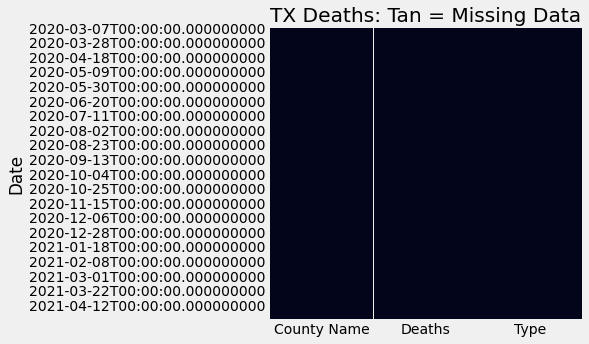

In [13]:
# Heatmap revealing missing data
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('TX Deaths: Tan = Missing Data')
sns.heatmap(df_txdeaths.isnull(), cbar=False)

In [14]:
# Looking at data types
df_txdeaths.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108288 entries, 2020-03-07 to 2021-05-03
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   County Name  108288 non-null  object
 1   Deaths       108288 non-null  int64 
 2   Type         108288 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.3+ MB


### California HHS Data

In [15]:
# Drop columns from CA data
df_ca = df_ca_raw.drop(['area_type', 'population', 'total_tests', 'positive_tests',
                        'reported_cases', 'reported_deaths', 'reported_tests'], axis=1)
# Convert to datetime
df_ca['date'] = pd.to_datetime(df_ca['date'])

# Rename columns
df_ca.columns = ['Date', 'County', 'Cases', 'Deaths']

# Index and sort by date
df_ca = df_ca.set_index('Date')
df_ca = df_ca.sort_values(by='Date')

# CHANGE CA DATA FOR CASES AND DEATHS FROM FLOAT TO INT
df_ca

,County,Cases,Deaths
Date,,,
2020-02-01,Yuba,0.0,0.0
2020-02-01,Mono,0.0,0.0
2020-02-01,Modoc,0.0,0.0
2020-02-01,Merced,0.0,0.0
2020-02-01,Mendocino,0.0,0.0
...,...,...,...
2021-05-04,Riverside,0.0,0.0
2021-05-04,Plumas,0.0,0.0
2021-05-04,Placer,0.0,0.0


<AxesSubplot:title={'center':'CA Data: Tan = Null Data'}, ylabel='Date'>

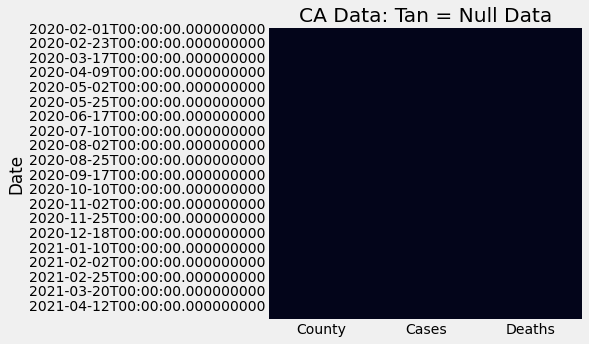

In [16]:
# Replace infinite numbers with NA, remove NA
df_ca = df_ca.replace([np.inf, -np.inf], np.nan).dropna(subset=['Cases', 'Deaths'], how='all')

# Plot heatmap to identify null data
fix, ax = plt.subplots(figsize=(5,5))
ax.set_title('CA Data: Tan = Null Data')
sns.heatmap(df_ca.isnull(), cbar=False)

In [37]:
# Looking at data types
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27540 entries, 2020-02-01 to 2021-05-04
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   County  27540 non-null  object 
 1   Cases   27540 non-null  float64
 2   Deaths  27540 non-null  float64
dtypes: float64(2), object(1)
memory usage: 860.6+ KB


***
# Analysis
***

## National Statistics

In [18]:
df_us.info()
# Top 10 Total Cases by State
tot_cases_state_us = df_us.groupby('State')['Total_Cases'].sum()
tot_cases_state_us.sort_values(ascending=False)[:10]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2020-01-22 to 2021-05-02
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   State         1000 non-null   object
 1   Total_Cases   1000 non-null   int64 
 2   New_Cases     1000 non-null   int64 
 3   Total_Deaths  1000 non-null   int64 
 4   New_Deaths    1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 46.9+ KB


State
FL     37089116
TX     23198562
OH     14628365
TN     14071317
GA     13566377
NY     11853077
PA     11598792
NYC    11194582
MA      6684198
AR      6278871
Name: Total_Cases, dtype: int64

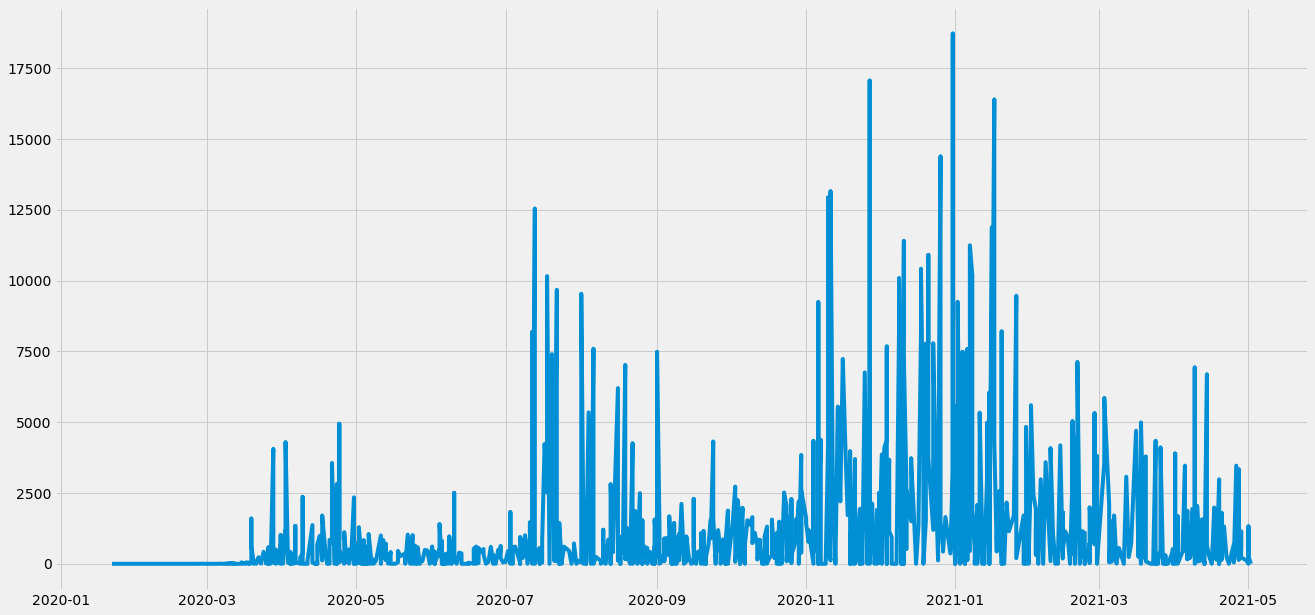

In [19]:
# Plot figure with US cases over time
fig, ax = plt.subplots(figsize=(20, 10))
us_cases = pd.DataFrame(df_us)
plt.plot(us_cases['New_Cases'])

In [20]:
# Plot figure with total cases over time in US
# fig, ax = plt.subplots(figsize=(20,10))
# tot_cases = pd.DataFrame(df_us, columns=['Date', 'Total_Cases', 'State'])
# plt.plot(tot_cases['State'], tot_cases['Total_Cases'])

In [21]:
# Top 10 Total Deaths by State
tot_deaths_state_us = df_us.groupby('State')['Total_Deaths'].sum()
tot_deaths_state_us.sort_values(ascending=False)[:10]

State
NYC    754311
FL     635634
TX     436154
PA     375331
NY     285102
OH     269603
MA     261220
GA     255748
TN     187824
AR     102762
Name: Total_Deaths, dtype: int64

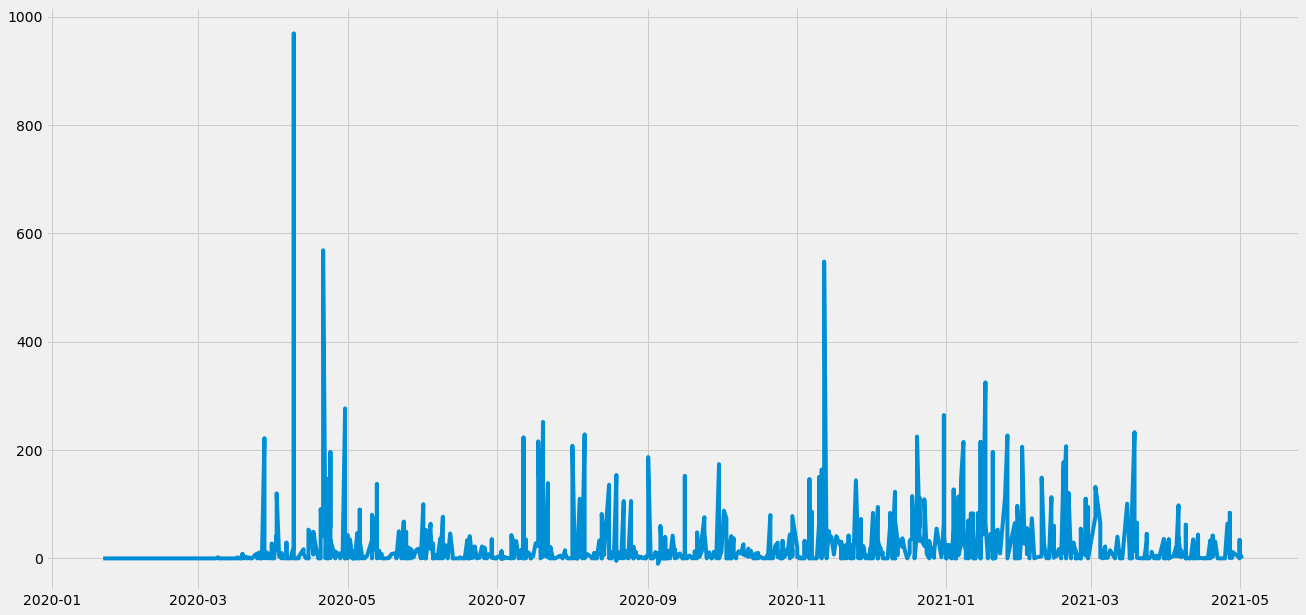

In [22]:
# Plot figure with US cases over time
fig, ax = plt.subplots(figsize=(20, 10))
us_deaths = pd.DataFrame(df_us)
plt.plot(us_deaths['New_Deaths'])

## Texas Statistics

In [23]:
# Total Cases by County, nlargest provides the largest value in a series
tot_cases_county_tx = df_txcases.groupby('County Name')['Cases'].nlargest(n=1).drop('Total')
tot_cases_county_tx.sort_values(ascending=False)[:10]

County Name  Date      
Harris       2021-05-04    393183
Dallas       2021-05-04    257895
Tarrant      2021-05-04    216096
Bexar        2021-05-04    180885
El Paso      2021-05-04    134441
Travis       2021-05-04     82526
Collin       2021-05-03     74216
Hidalgo      2021-05-04     58398
Fort Bend    2021-05-04     57386
Denton       2021-05-04     54859
Name: Cases, dtype: int64

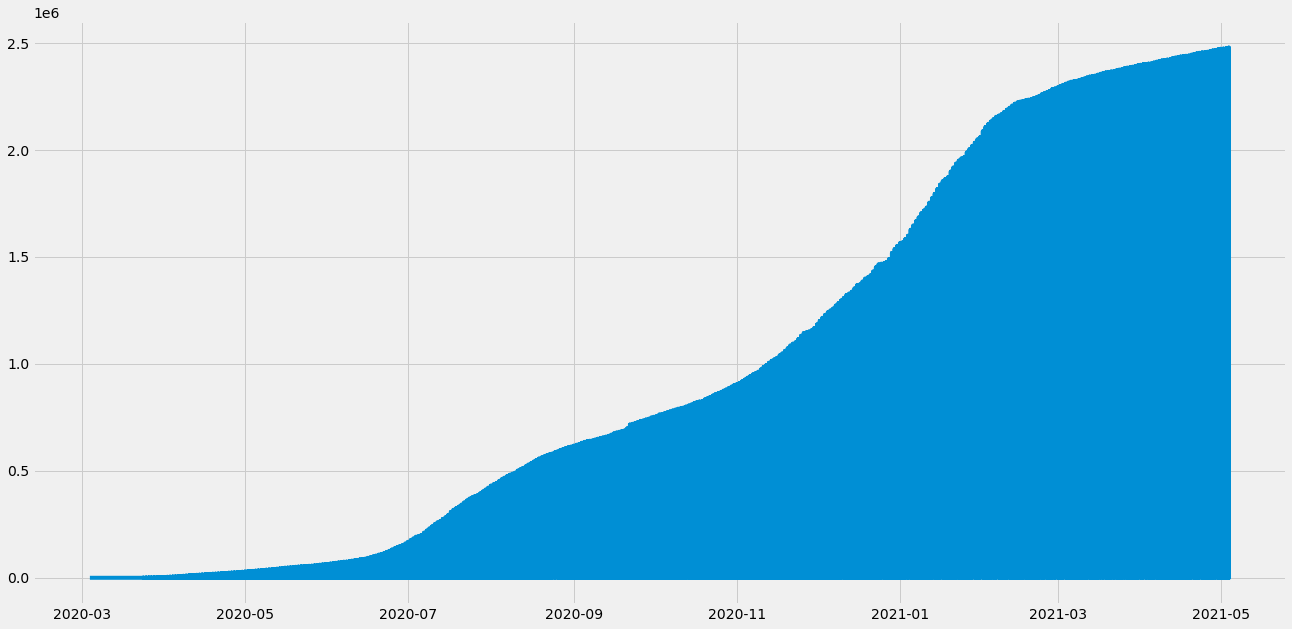

In [24]:
# Plot figure with Texas cases over time
fig, ax = plt.subplots(figsize=(20, 10))
tx_cases = pd.DataFrame(df_txcases)
plt.plot(tx_cases['Cases'])

In [25]:
# Total Cases by County
tot_deaths_county_tx = df_txdeaths.groupby('County Name')['Deaths'].max().drop('Grand Total')
tot_deaths_county_tx.sort_values(ascending=False)[:10]

County Name
HARRIS     6230
DALLAS     3988
BEXAR      3489
TARRANT    3022
EL PASO    2663
HIDALGO    2529
CAMERON    1479
TRAVIS      998
COLLIN      822
WEBB        788
Name: Deaths, dtype: int64

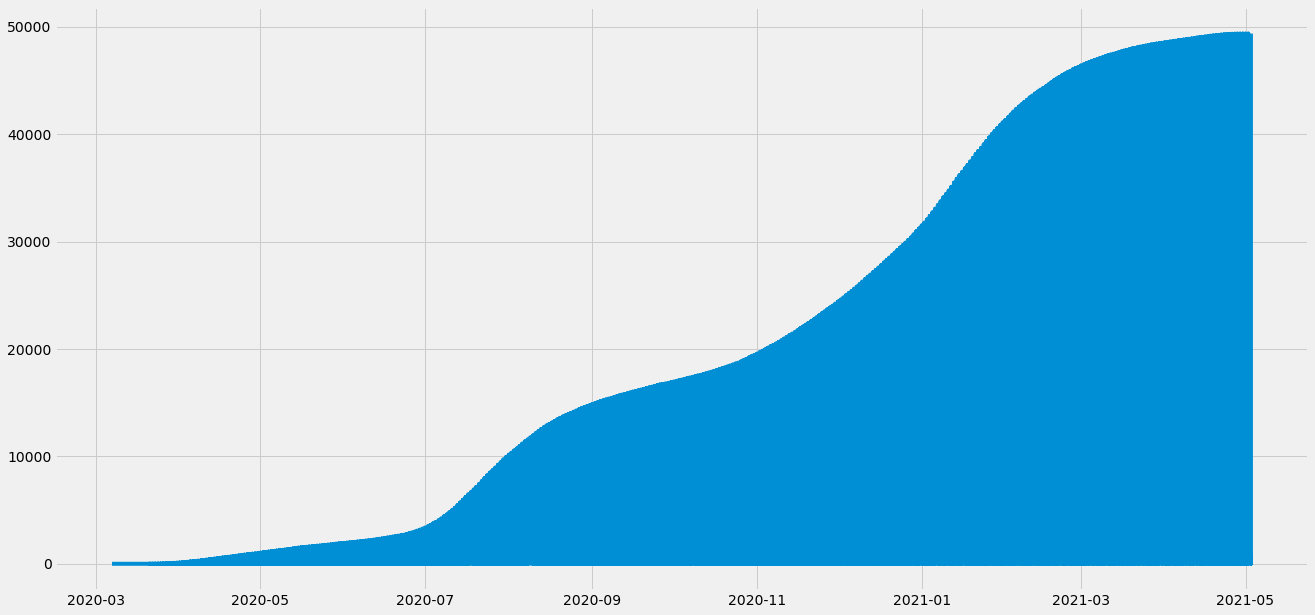

In [26]:
# Plot figure with Texas cases over time
fig, ax = plt.subplots(figsize=(20, 10))
tx_deaths = pd.DataFrame(df_txdeaths)
plt.plot(tx_deaths['Deaths'])

## California Statistics

In [27]:
# Total Cases by County
tot_cases_county_ca = df_ca.groupby('County')['Cases'].sum().drop('California')
tot_cases_county_ca.sort_values(ascending=False)[:10]

County
Los Angeles       1193108.0
San Bernardino     290888.0
Riverside          287245.0
San Diego          276879.0
Orange             253167.0
Santa Clara        118418.0
Sacramento         103381.0
Fresno             101449.0
Kern                95716.0
Alameda             86890.0
Name: Cases, dtype: float64

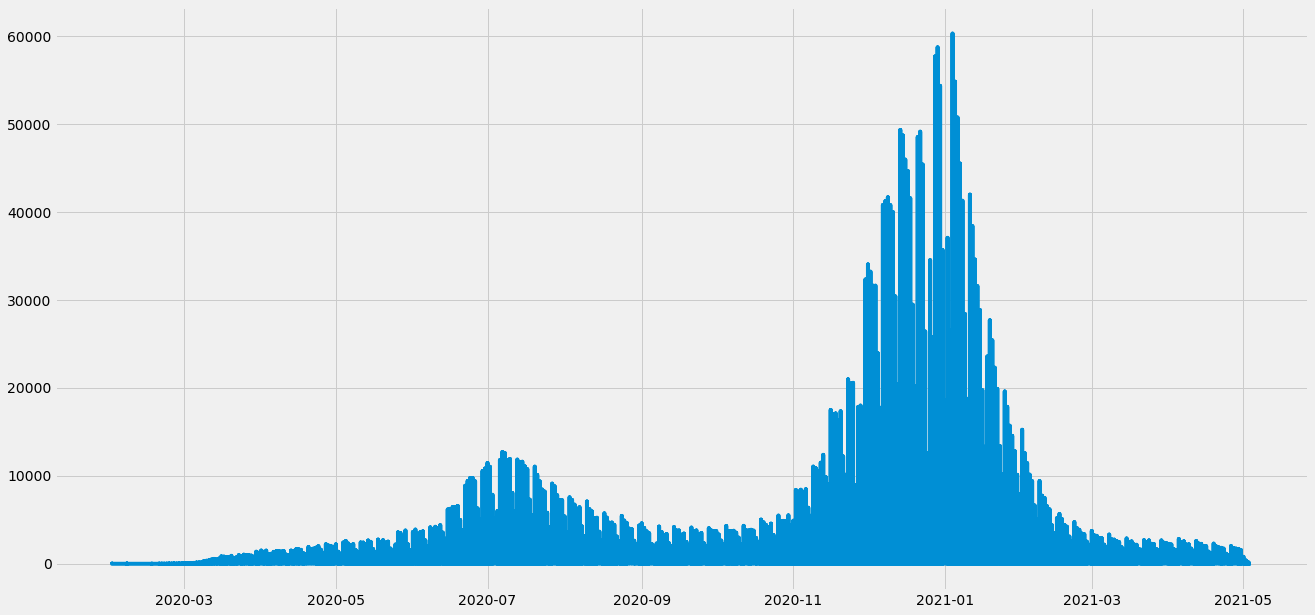

In [28]:
# Plot figure with California cases over time
fig, ax = plt.subplots(figsize=(20, 10))
ca_cases = pd.DataFrame(df_ca)
plt.plot(ca_cases['Cases'])

In [29]:
# Total Cases by County
tot_deaths_county_ca = df_ca.groupby('County')['Deaths'].sum().drop('California')
tot_deaths_county_ca.sort_values(ascending=False)[:10]

County
Los Angeles       23937.0
Orange             4752.0
San Bernardino     4401.0
Riverside          4311.0
San Diego          3713.0
Santa Clara        1969.0
Fresno             1647.0
Sacramento         1595.0
San Joaquin        1320.0
Kern               1280.0
Name: Deaths, dtype: float64

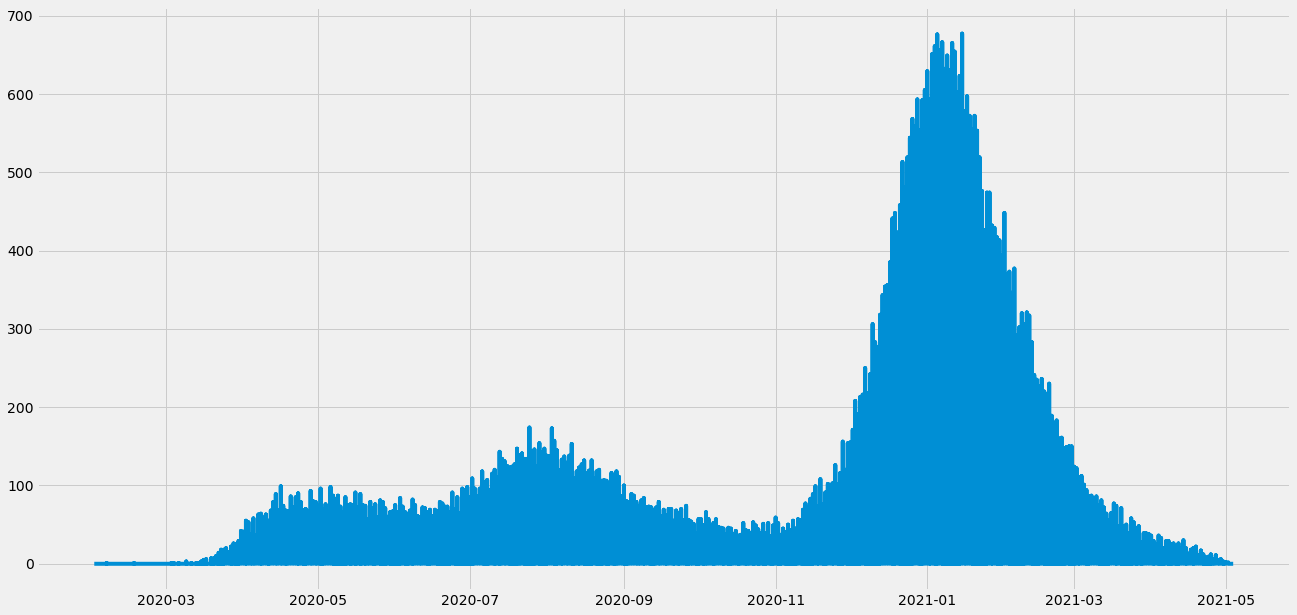

In [30]:
# Plot figure with California deaths over time
fig, ax = plt.subplots(figsize=(20, 10))
ca_cases = pd.DataFrame(df_ca)
plt.plot(ca_cases['Deaths'])

# Insights

In [31]:
# Insights to be shown

# 1. National Impact

In [32]:
# Insights for issue 1

# 2. Most Impacted Metro Areas

In [33]:
# Insights for issue 2

# 3. Policy Timeline and Coronavirus Impact

In [34]:
# Insights for issue 3

# 4. COVID-19 Impact: California and Texas

In [35]:
# Insights for issue 4